In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()

%matplotlib inline



In [132]:
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 16
mpl.rcParams['xtick.labelsize'] = 13
mpl.rcParams['ytick.labelsize'] = 13
mpl.rcParams['legend.fontsize'] = 13

In [133]:
df_feat_imp = pd.read_csv('feature_importance_results.csv')
del df_feat_imp['Unnamed: 0']
df_feat_imp.shape

(232560, 5)

In [134]:
df_feat_imp.head(5)

,num_words,use_tfidf,model,feature,importance
0,10,True,log,babi,9.454868
1,10,True,log,get,8.182549
2,10,True,log,go,3.165664
3,10,True,log,got,7.297375
4,10,True,log,know,5.848218


In [135]:
#calculate ranks
df_feat_imp = df_feat_imp[df_feat_imp['model'] != 'log']
df_feat_imp['model_word_rank'] = df_feat_imp.groupby(['model','num_words'])['importance'].rank(ascending=False)

#aggregate average word ranks
model_avg_ranks = df_feat_imp.groupby(['model', 'feature'])['model_word_rank'].mean().reset_index()
model_avg_ranks.tail(10)

,model,feature,model_word_rank
1510,tree100,youth,1155.060606
1511,tree100,yuh,1509.666667
1512,tree100,z,1193.833333
1513,tree100,za,1141.057143
1514,tree100,zeit,578.641667
1515,tree100,zurück,1200.680000
1516,tree100,zwei,1253.875000
1517,tree100,ça,581.700935
1518,tree100,é,314.270677
1519,tree100,–,1153.304348


In [136]:
model_avg_ranks.sort_values('model_word_rank')

,model,feature,model_word_rank
747,tree100,love,1.019737
79,tree100,babi,2.657895
682,tree100,know,2.907895
896,tree100,oh,4.611842
725,tree100,like,4.973684
527,tree100,got,6.125000
501,tree100,get,7.855263
516,tree100,go,9.539474
1328,tree100,time,11.144737
507,tree100,girl,12.135135


In [137]:
model_index = df_feat_imp.pivot_table(index=['model', 'num_words'], columns='feature', values='importance')
model_index.head(20)

feature             &  ab  abov  accept  ach  across  act  action  ador  \
model   num_words                                                         
tree100 10        NaN NaN   NaN     NaN  NaN     NaN  NaN     NaN   NaN   
        20        NaN NaN   NaN     NaN  NaN     NaN  NaN     NaN   NaN   
        30        NaN NaN   NaN     NaN  NaN     NaN  NaN     NaN   NaN   
        40        NaN NaN   NaN     NaN  NaN     NaN  NaN     NaN   NaN   
        50        NaN NaN   NaN     NaN  NaN     NaN  NaN     NaN   NaN   
        60        NaN NaN   NaN     NaN  NaN     NaN  NaN     NaN   NaN   
        70        NaN NaN   NaN     NaN  NaN     NaN  NaN     NaN   NaN   
        80        NaN NaN   NaN     NaN  NaN     NaN  NaN     NaN   NaN   
        90        NaN NaN   NaN     NaN  NaN     NaN  NaN     NaN   NaN   
        100       NaN NaN   NaN     NaN  NaN     NaN  NaN     NaN   NaN   
        110       NaN NaN   NaN     NaN  NaN     NaN  NaN     NaN   NaN   
        120       NaN NaN   NaN     NaN  NaN     NaN  NaN     NaN   NaN   
        130       NaN NaN   NaN     NaN  NaN     NaN  NaN     NaN   NaN   
        140       NaN NaN   NaN     NaN  NaN     NaN  NaN     NaN   NaN   
        150       NaN NaN   NaN     NaN  NaN     NaN  NaN     NaN   NaN   
        160       NaN NaN   NaN     NaN  NaN     NaN  NaN     NaN   NaN   
        170       NaN NaN   NaN     NaN  NaN     NaN  NaN     NaN   NaN   
        180       NaN NaN   NaN     NaN  NaN     NaN  NaN     NaN   NaN   
        190       NaN NaN   NaN     NaN  NaN     NaN  NaN     NaN   NaN   
        200       NaN NaN   NaN     NaN  NaN     NaN  NaN     NaN   NaN   

feature            afraid ...  youth  yuh   z  za  zeit  zurück  zwei  ça  \
model   num_words         ...                                               
tree100 10            NaN ...    NaN  NaN NaN NaN   NaN     NaN   NaN NaN   
        20            NaN ...    NaN  NaN NaN NaN   NaN     NaN   NaN NaN   
        30            NaN ...    NaN  NaN NaN NaN   NaN     NaN   NaN NaN   
        40            NaN ...    NaN  NaN NaN NaN   NaN     NaN   NaN NaN   
        50            NaN ...    NaN  NaN NaN NaN   NaN     NaN   NaN NaN   
        60            NaN ...    NaN  NaN NaN NaN   NaN     NaN   NaN NaN   
        70            NaN ...    NaN  NaN NaN NaN   NaN     NaN   NaN NaN   
        80            NaN ...    NaN  NaN NaN NaN   NaN     NaN   NaN NaN   
        90            NaN ...    NaN  NaN NaN NaN   NaN     NaN   NaN NaN   
        100           NaN ...    NaN  NaN NaN NaN   NaN     NaN   NaN NaN   
        110           NaN ...    NaN  NaN NaN NaN   NaN     NaN   NaN NaN   
        120           NaN ...    NaN  NaN NaN NaN   NaN     NaN   NaN NaN   
        130           NaN ...    NaN  NaN NaN NaN   NaN     NaN   NaN NaN   
        140           NaN ...    NaN  NaN NaN NaN   NaN     NaN   NaN NaN   
        150           NaN ...    NaN  NaN NaN NaN   NaN     NaN   NaN NaN   
        160           NaN ...    NaN  NaN NaN NaN   NaN     NaN   NaN NaN   
        170           NaN ...    NaN  NaN NaN NaN   NaN     NaN   NaN NaN   
        180           NaN ...    NaN  NaN NaN NaN   NaN     NaN   NaN NaN   
        190           NaN ...    NaN  NaN NaN NaN   NaN     NaN   NaN NaN   
        200           NaN ...    NaN  NaN NaN NaN   NaN     NaN   NaN NaN   

feature                   é   –  
model   num_words                
tree100 10              NaN NaN  
        20              NaN NaN  
        30              NaN NaN  
        40              NaN NaN  
        50              NaN NaN  
        60              NaN NaN  
        70              NaN NaN  
        80              NaN NaN  
        90              NaN NaN  
        100             NaN NaN  
        110             NaN NaN  
        120             NaN NaN  
        130             NaN NaN  
        140             NaN NaN  
        150             NaN NaN  
        160             NaN NaN  
        170             NaN NaN  
        

In [138]:
def censor_strings(strings):
    return ['n****' if x =='nigga' else x for x in strings]

In [139]:
model_avg_ranks.sort_values(['model', 'model_word_rank']).iloc[60:80]

,model,feature,model_word_rank
437,tree100,find,63.115646
214,tree100,chorus,63.500000
62,tree100,around,64.212329
1205,tree100,soul,65.513889
410,tree100,fall,65.554054
423,tree100,fear,65.862319
1456,tree100,whi,66.162162
730,tree100,littl,67.595890
1081,tree100,said,67.869863
389,tree100,everi,70.586207


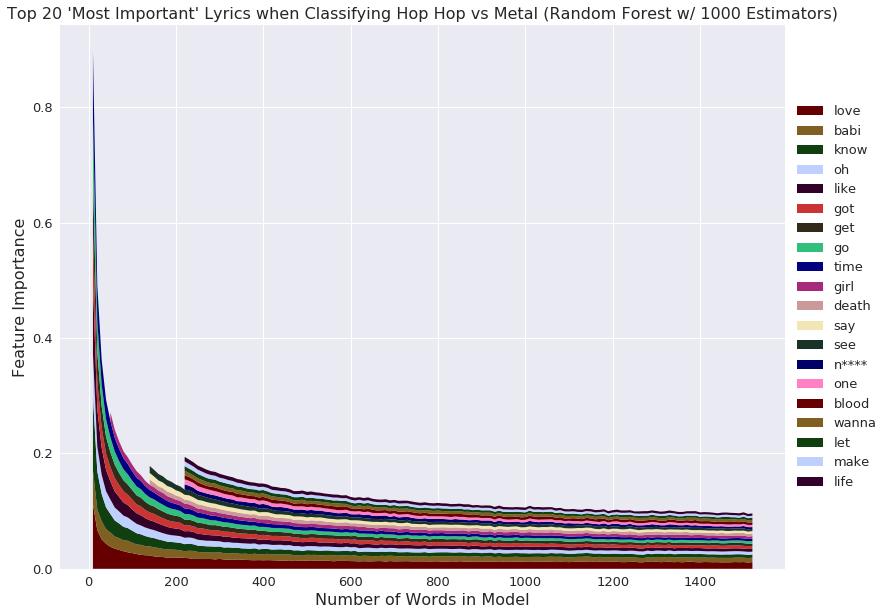

In [140]:
grouped_models = model_index.groupby(level=[0])

index = 0
vals = None
test = list(model_avg_ranks.sort_values(['model', 'model_word_rank']).iloc[0:20]['feature'])
for model_name, val in grouped_models:
    vals = val[test]
    break

colors =  ("#FF4A46", "#008941", "#006FA6", "#A30059",
"#FFDBE5", "#7A4900", "#0000A6", "#63FFAC", "#B79762", "#004D43", "#8FB0FF", "#997D87",
"#5A0007", "#809693", "#FEFFE6", "#1B4400", "#4FC601", "#3B5DFF", "#4A3B53", "#FF2F80",
"#61615A", "#BA0900", "#6B7900", "#00C2A0", "#FFAA92", "#FF90C9", "#B903AA", "#D16100",
"#DDEFFF", "#000035", "#7B4F4B", "#A1C299")
colors = ('#660000', '#7f6020', '#104010', '#bfd0ff', '#330029', '#cc3333', '#332b1a', '#30bf7c', '#000080', '#a6297c', '#cc9999', '#f2e6b6', '#1a3327', '#000066', '#ff80c4') 
plt.figure(figsize=(13,10), facecolor='w')
plt.stackplot(vals.index.levels[1], [vals[x] for x in test], colors=colors)
plt.ylabel('Feature Importance')
plt.xlabel('Number of Words in Model')
plt.title('Top 20 \'Most Important\' Lyrics when Classifying Hop Hop vs Metal (Random Forest w/ 1000 Estimators)')

# Put a legend to the right of the current axis
censored_list = ['n****' if x =='nigga' else x for x in test]
plt.legend(censored_list, loc='center left', bbox_to_anchor=(1, 0.5));